<a href="https://colab.research.google.com/github/Rizwankaka/Agentic-AI-/blob/main/Crewai/crewai_notebooks/crewai_project_ai_product_manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crewai Capstone Project - The AI Product Manager

## Goal
In this project, we are building a multi-agent system using the crewai library to analyze an image of a B2B digital menu startup. The system consists of four agents:

* Image Description Agent: Provides a detailed description of the image.
* UX Critique Agent: Critically analyzes the image based on the description.
* UX Suggestion Agent: Offers actionable suggestions to improve the image design.
* AI Product Manager: Writes user stories and prioritizes suggestions based on customer feedback.

In [6]:
%pip install -qU crewai 'crewai[tools]' openai

In [3]:
# Retrieve the OpenAI API key securely from Google Colab's user data
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

In [4]:
# Import essential libraries for image processing and agent creation
from PIL import Image  # For image manipulation
from crewai_tools import VisionTool  # Specialized tool for image analysis
from crewai import Agent, Task, Crew, Process  # Core components of the crewai library
from langchain_openai import ChatOpenAI  # Interface to interact with OpenAI's language models
from IPython.display import display, Markdown  # For displaying outputs in Jupyter notebooks

We import PIL for image handling, crewai components for agent management, and langchain_openai to interface with OpenAI's GPT-4 model. The VisionTool is a custom tool for image analysis.

In [5]:
# Initialize the vision tool for image analysis
vision_tool = VisionTool()

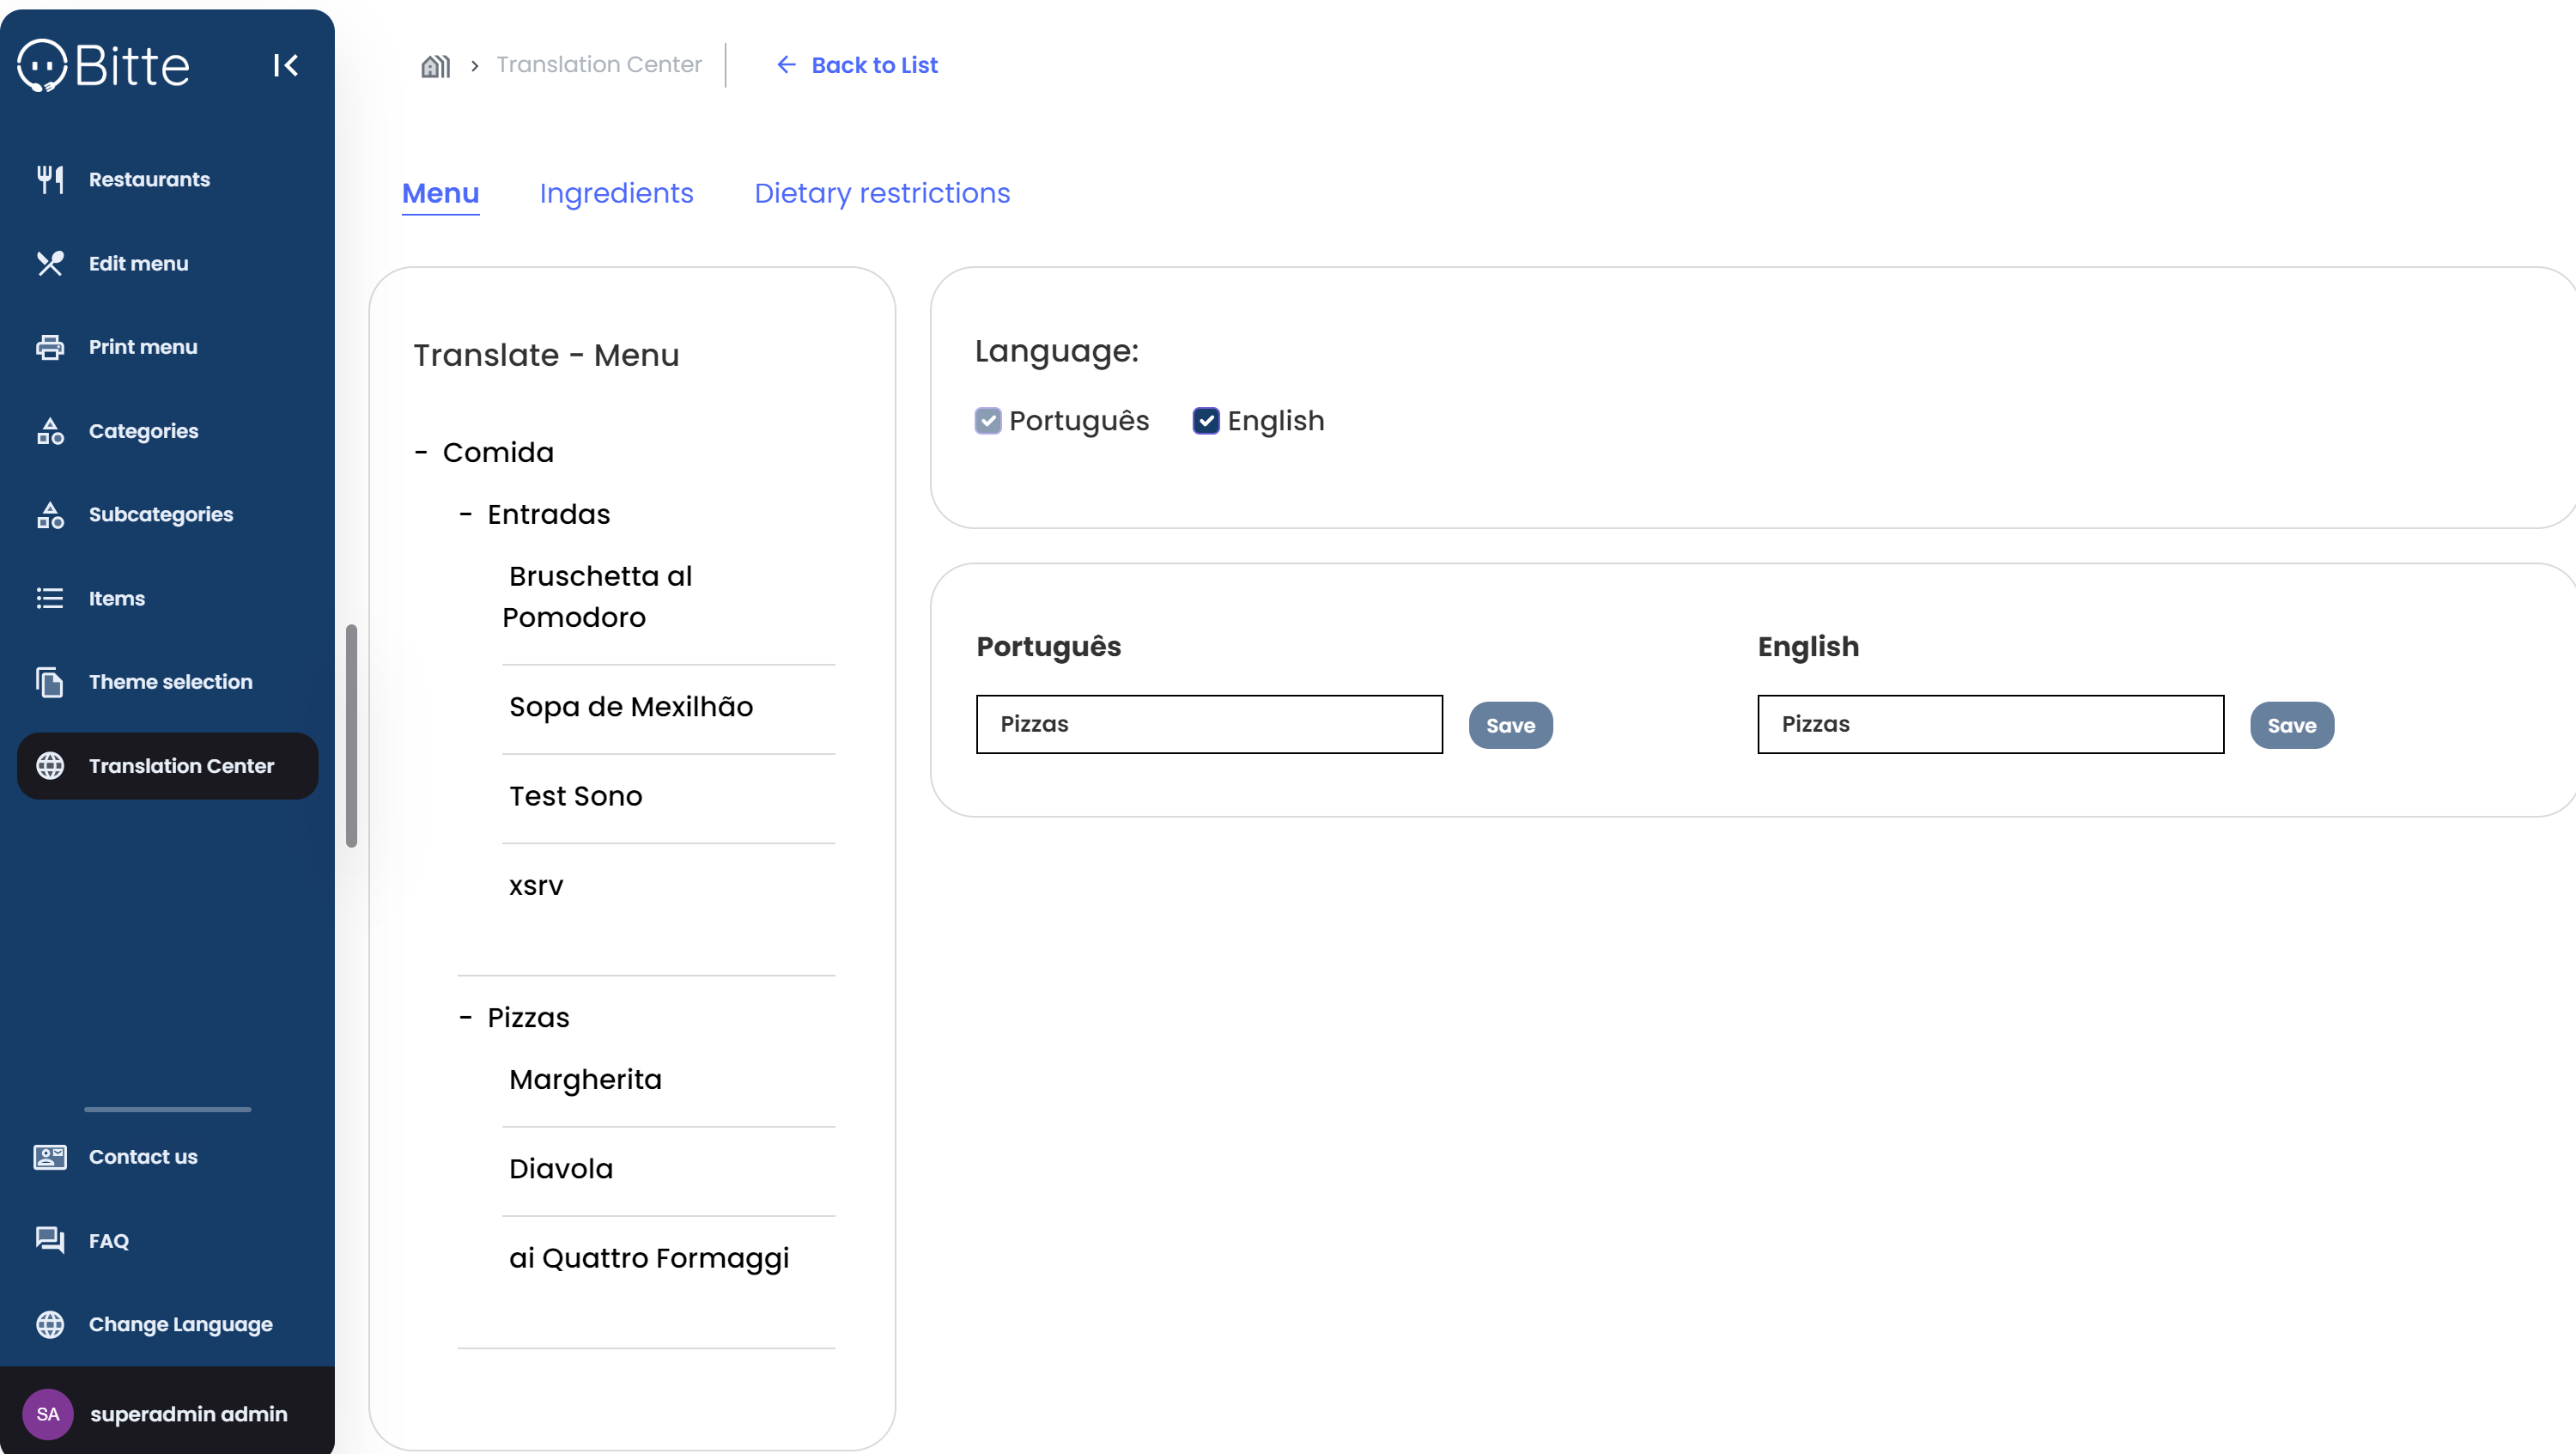

In [23]:
# Load the Image using the Pillow library
image_path = "/content/translation.png"
image = Image.open(image_path)
image

The image translation.png is opened and stored in the image variable for later use.

## AGENT 1 - Image Description Agent

We create the first agent responsible for describing the image.

In [25]:
# Build the description agent with its role, goal, and backstory
description_agent = Agent(
    role="Image Description Agent",
    goal=f"Fully describe the digital image ({image_path}), of a B2B Digital Menu startup, including its visible elements, design, and intended purpose.",
    backstory="You are responsible for analyzing images and describing their purpose in detail.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [26]:
# Create the description task assigned to the description agent
description_task = Task(
    description="Identify and fully describe the digital image and explain its purpose.",
    expected_output="A complete description of the image and its purpose.",
    agent=description_agent
)

The Image Description Agent uses the VisionTool to analyze the image and provides a detailed description. We set the language model to GPT-4 with a temperature of 0.8 to allow for creative outputs.

## AGENT 2 - Critique Agent
We create the second agent to critique the image based on the description.

In [27]:
# Build the critique agent with its role, goal, and backstory
critique_agent = Agent(
    role="UX Critique Agent",
    goal=f"Critique the image {image_path} based on its description and intended purpose provided by the Image Description Agent.",
    backstory="You critically evaluate images, specifically UX designs, and point out flaws, weaknesses, and areas of improvement.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [28]:
# Create the critique task assigned to the critique agent, using the description task as context
critique_task = Task(
    description="Critically analyze the image based on its description and intended purpose.",
    expected_output="A complete critique of the image, highlighting design flaws and areas of improvement.",
    agent=critique_agent,
    context=[description_task]
)

The UX Critique Agent evaluates the image using the description from the first agent. The context parameter allows the agent to access the output of the description_task.

## AGENT 3 - UX Suggestion
We create the third agent to provide suggestions for improving the image.

In [29]:
# Create the UX suggestion agent with its role, goal, and backstory
ux_agent = Agent(
    role="UX Suggestion Agent",
    goal=f"Provide design and layout suggestions for the image {image_path} based on the context from the Image Description Agent and UX Critique Agent.",
    backstory="You specialize in providing actionable suggestions to improve the design of website images.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [30]:
# Create the UX suggestion task assigned to the UX suggestion agent, using previous tasks as context
ux_task = Task(
    description="Provide suggestions for improving the image design and layout, based on the context from the description and critique agents.",
    expected_output="A list of actionable suggestions for improving the image design and layout based on the image's purpose and critiques.",
    agent=ux_agent,
    context=[description_task, critique_task]
)

The UX Suggestion Agent leverages the outputs from both the description and critique agents to generate improvement suggestions.

## AGENT 4 - AI Product Manager

We create the fourth agent to write user stories and prioritize suggestions.

In [32]:
# Define the AI Product Manager Agent with its role, goal, and backstory
pm_agent = Agent(
    role="AI Product Manager",
    goal=f"Write user stories based on the suggestions from the UX agent for the image {image_path} and prioritize the suggestions based on probable customer feedback.",
    backstory="You act as a product manager for a digital company, prioritizing suggestions and creating user stories to guide improvements.",
    verbose=True,
    tools=[vision_tool],
    llm=ChatOpenAI(model_name="gpt-4o", temperature=0.8)
)

In [33]:
# Create a task for the AI Product Manager, using all previous tasks as context
pm_task = Task(
    description="Write user stories based on the suggestions from the UX agent for the image and prioritize the suggestions based on probable customer feedback.",
    expected_output="A list of prioritized improvements based on expected impact on the customer, and the user stories.",
    agent=pm_agent,
    context=[description_task, critique_task, ux_task]
)

The AI Product Manager consolidates the suggestions and critiques to create actionable user stories, prioritizing them based on customer impact.

## Run the AI Product Manager

We now define the crew and run the tasks sequentially.

In [34]:
# Define the crew with all agents and tasks, set to run sequentially
crew = Crew(
    agents=[description_agent, critique_agent, ux_agent, pm_agent],
    tasks=[description_task, critique_task, ux_task, pm_task],
    verbose=True,
    process=Process.sequential
)

# Kick off the crew to start processing the tasks
result = crew.kickoff()

# Agent: Image Description Agent
## Task: Identify and fully describe the digital image and explain its purpose.


# Agent: Image Description Agent
## Using tool: Vision Tool
## Tool Input: 
"{\"image_path_url\": \"/content/translation.png\"}"
## Tool Output: 
The image appears to be a user interface for a menu translation tool called "Bitte." It shows options to translate menu items between Portuguese and English. The menu includes categories like "Entradas" (Appetizers) and "Pizzas," with specific items listed under each category. There are fields for entering translations in both languages and buttons to save the changes. Additionally, it features a sidebar with options like "Restaurants," "Edit menu," "Print menu," and other related functions.


# Agent: Image Description Agent
## Final Answer: 
The digital image is a user interface design for a translation tool named "Bitte" which is aimed at facilitating the translation of restaurant menus, specifically for a B2B digital menu ser

The Crew object manages all agents and tasks. By setting the process to Process.sequential, we ensure that each task is completed before the next one starts, maintaining the context flow.

Finally, we extract and display the outputs from each agent. We loop through each task's output and display it using Markdown formatting for better readability in the Jupyter notebook.

In [35]:
# extract and display the output of each agent
for idx, task_output in enumerate(result.tasks_output):
  display(Markdown(f"### Agent {idx+1}: {task_output.agent}\n{task_output.raw}"))

### Agent 1: Image Description Agent
The digital image is a user interface design for a translation tool named "Bitte" which is aimed at facilitating the translation of restaurant menus, specifically for a B2B digital menu service. The interface prominently features the translation capabilities between Portuguese and English. It includes various menu categories such as "Entradas" (Appetizers), "Pizzas," and other menu items which are listed with fields for inputting translations in the respective languages. This interface seems to offer functionalities such as saving these translations, editing menus, and printing menus, aimed at restaurant owners or managers.

The interface is likely intended to provide an easy and efficient way for restaurants to offer multilingual menu options, thus enhancing accessibility for international customers. Additionally, it features a sidebar with navigation options such as "Restaurants," which suggests that users might be able to manage multiple menus or establishments through this platform. The design is structured to facilitate ease of use, focusing on practical functionality for its business users in the context of a digital menu service that can be easily updated and translated for diverse customer bases.

### Agent 2: UX Critique Agent
The user interface design for the "Bitte" translation tool exhibits several strengths and areas for improvement. Here is a detailed critique:

1. **Design Clarity and Focus**:
   - The interface effectively highlights its primary function—menu translation—by prominently displaying translation fields for each menu item. This clear focus on translating menu items between Portuguese and English reinforces its purpose and user expectations.

2. **Navigation and Usability**:
   - The inclusion of a sidebar with navigation options, such as "Restaurants," suggests that users can manage multiple menus or establishments, which is a beneficial feature for B2B users. However, the sidebar could benefit from iconography or a more visually distinct layout to enhance intuitive navigation.
   - The interface should ensure that navigation options are easily distinguishable and not cluttered to maintain ease of use. 

3. **Translation Workflow**:
   - The workflow for translating menu items seems straightforward, but it could be improved by providing a bulk translation option for similar menu items, saving time for the user.
   - Including a feature for automatic suggestions or integration with a translation API could further enhance efficiency and reduce manual effort.

4. **Accessibility and Language Support**:
   - While the interface focuses on Portuguese and English, it would be advantageous to support additional languages, as restaurant businesses often cater to a diverse clientele.
   - Ensuring that the input fields are accessible, with appropriate text size and contrast, is crucial for readability and usability.

5. **Actionable Features**:
   - The ability to save, edit, and print menus is essential. These actions should be prominently placed and clearly labeled to prevent errors and confusion.
   - Providing confirmation dialogs or notifications after saving translations can improve user confidence that their changes have been successfully applied.

6. **Visual Design**:
   - The overall aesthetic should align with modern UI standards, ensuring it is visually appealing without overwhelming the user. A more cohesive color scheme and consistent typography can enhance the professional look and feel of the tool.
   - Consider user feedback on usability and visual satisfaction to iteratively improve the design.

7. **Help and Support**:
   - Including tooltips or a help section for first-time users can improve onboarding and provide context for specific features, especially for non-tech-savvy restaurant managers.

By addressing these areas, the "Bitte" translation tool can better serve its target users, providing a seamless and efficient experience that enhances menu accessibility for international customers.

### Agent 3: UX Suggestion Agent
1. **Enhance Navigation with Visual Cues**:
   - Incorporate iconography in the sidebar navigation options to improve visual distinction and intuitive understanding. This can assist users in quickly finding and managing multiple menus or establishments.

2. **Streamline Translation Workflow**:
   - Implement a bulk translation feature for similar menu items to reduce manual input time. This would significantly improve efficiency for users managing extensive menus.
   - Integrate an automatic translation suggestion feature using a translation API to minimize manual effort and improve accuracy.

3. **Expand Language Support and Accessibility**:
   - Offer support for additional languages beyond Portuguese and English to cater to a broader international clientele.
   - Ensure all text fields and labels are accessible, featuring appropriate text size and high contrast for better readability.

4. **Improve Actionable Features Visibility**:
   - Position the save, edit, and print buttons prominently, making them easily accessible and clearly labeled to prevent user error.
   - Add confirmation dialogs or notifications following successful actions like saving translations to reassure users their changes are applied.

5. **Refine Visual Design**:
   - Adopt a cohesive color scheme and consistent typography to align with modern UI standards, enhancing the professional aesthetic without overwhelming the user.
   - Gather user feedback on design satisfaction and usability to guide iterative visual improvements.

6. **Include Helpful Onboarding Tools**:
   - Add tooltips or a help section aimed at new users to guide them through the interface, especially focusing on non-tech-savvy restaurant managers.

By implementing these suggestions, the "Bitte" translation tool can enhance its user interface, providing a more efficient and user-friendly experience for restaurant owners and managers seeking to offer multilingual menu options.

### Agent 4: AI Product Manager
**Prioritized Improvements and User Stories for "Bitte" Translation Tool:**

1. **Streamline Translation Workflow**:
   - **User Story**: As a restaurant manager, I want to be able to translate similar menu items in bulk so that I can save time and effort when managing large menus.
   - **Priority**: High - This feature is expected to significantly enhance efficiency and productivity for users, especially those managing extensive menus.

2. **Integrate Automatic Translation Suggestions**:
   - **User Story**: As a restaurant owner, I want automatic translation suggestions for menu items to minimize manual input and improve translation accuracy.
   - **Priority**: High - This integration will reduce manual effort and increase the accuracy of translations, providing a better user experience.

3. **Expand Language Support and Accessibility**:
   - **User Story**: As a restaurant manager, I want the translation tool to support multiple languages beyond Portuguese and English to cater to a diverse customer base.
   - **Priority**: Medium - Supporting more languages will broaden the tool's usability, appealing to more international users.

4. **Enhance Navigation with Visual Cues**:
   - **User Story**: As a user, I want clear visual cues in the navigation sidebar, such as icons, to easily distinguish different management options for better usability.
   - **Priority**: Medium - Improved navigation will enhance user experience by making it easier to manage multiple menus and establishments.

5. **Improve Actionable Features Visibility**:
   - **User Story**: As a user, I want save, edit, and print buttons to be prominently placed and clearly labeled to ensure my actions are completed accurately.
   - **Priority**: Medium - Clear labeling and positioning of essential features will reduce user errors and increase confidence in using the tool.

6. **Refine Visual Design**:
   - **User Story**: As a user, I want a modern, cohesive visual design with consistent typography and color schemes to have a pleasant and professional interface experience.
   - **Priority**: Low - While improving aesthetics can enhance user satisfaction, it is less critical compared to functionality improvements.

7. **Include Helpful Onboarding Tools**:
   - **User Story**: As a new user, I want tooltips or a help section to guide me through the interface, especially if I am not tech-savvy.
   - **Priority**: Low - Onboarding tools can ease the learning curve for new users, enhancing initial user experience.

By implementing these improvements, the "Bitte" translation tool will efficiently serve its B2B users, allowing restaurant owners and managers to effectively offer multilingual menu options, ultimately enhancing accessibility for international customers.